### Organization of libraries

In [1]:
#organização dos arquivos
import os
#salvar/carregar arquivos em diferentes formatos
import joblib
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#gerar imagem
import matplotlib.image as mpimg


In [2]:
#Biblioteca para carregar o modelo de regressão
from keras.models import load_model

2022-08-05 19:08:10.648560: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 19:08:10.648713: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Huh7 regression model - MINOR ERROR

In [3]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens
modelo_huh7_menor_erro = load_model('/data/results/results_Huh7/9_model__huh7_regressao_menor_erro_Mean_squared_error_500_epochs2022-6-30.h5')
modelo_huh7_menor_erro

2022-08-05 19:08:14.946571: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-05 19:08:14.946902: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-05 19:08:14.946919: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-05 19:08:14.947770: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a8bce4a08e2b): /proc/driver/nvidia/version does not exist
2022-08-05 19:08:14.948040: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

### Data needed to get X_test

In [4]:
#Importando as imagens que foram salvas para treinar e testar o modelo
X_test_menor_erro = joblib.load('/data/results/results_Huh7/10_images_de_X_test_huh7_melhor_modelo_500_epochs_2022-6-30.gz') #carregando arquivo
X_test_menor_erro.shape 

(212, 200, 200, 3)

In [5]:
#Importando os rótulos de cada imagem - número de células para cada imagem
y_test_menor_erro = joblib.load('/data/results/results_Huh7/11_images_de_y_test_huh7_melhor_modelo_500_epochs_2022-6-30.gz')
y_test_menor_erro.shape

(212,)

### Getting X_test values to build predicted data list

In [6]:
#Usando método predict para obter os valores dos dados previstos
dados_prev = modelo_huh7_menor_erro.predict(X_test_menor_erro)
lista_previsto_menor_erro = dados_prev.flatten().tolist() #Organizando os dados em formato de lista - tolist/e os dados de array em uma ÚNICA lista-flatten
#lista_previsto

2022-08-05 19:08:20.370663: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25440000 exceeds 10% of free system memory.
2022-08-05 19:08:20.969881: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-05 19:08:20.970457: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800005000 Hz
2022-08-05 19:08:23.371966: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 15360000 exceeds 10% of free system memory.
2022-08-05 19:08:23.438565: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 160579584 exceeds 10% of free system memory.
2022-08-05 19:08:28.997331: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 40144896 exceeds 10% of free system memory.
2022-08-05 19:08:29.349043: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 77078528 exceeds 10% of free system memory.


### Observed data values

In [7]:
lista_observado_menor_erro = list(y_test_menor_erro)
#lista_observado

In [8]:
#importando pandas para organizar as listas
import pandas as pd
#importando a biblioteca para gerar a correlação
from scipy.stats.stats import pearsonr as stats


### Creating the dataframe to organize the lists of values

In [9]:
df = pd.DataFrame(zip(lista_observado_menor_erro,lista_previsto_menor_erro), columns = ['Observed values','Lista preditos'])
df.head()

,Observed values,Lista preditos
0,338,435.933655
1,692,1079.670654
2,369,534.388062
3,175,220.816025
4,175,275.766693


In [10]:
#arredondando os dados previstos
dado_arre = round(df['Lista preditos'],2)
df['Predicted values'] = dado_arre
# df

In [11]:
#invertendo a ordem das colunas
df = df.reindex(columns=['Observed values','Predicted values','Lista preditos'])
df.head()

,Observed values,Predicted values,Lista preditos
0,338,435.93,435.933655
1,692,1079.67,1079.670654
2,369,534.39,534.388062
3,175,220.82,220.816025
4,175,275.77,275.766693


### Pearson Correlation Chart

In [12]:
from scipy.stats.stats import spearmanr as spearman #importando a biblioteca para gráfico de correlação


<Figure size 1080x1080 with 0 Axes>

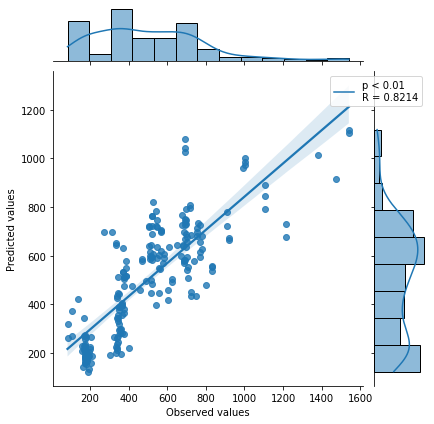

In [13]:
col1_obt = 0
col2_prev = 1
pear_pos_menor_erro = stats(df[df.columns[col1_obt]], df[df.columns[col2_prev]])
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(15,15))
sns.jointplot(
    x=df.columns[col1_obt],
    y=df.columns[col2_prev],
    kind='reg',
    data=df
)


# plt.legend([
#     'p = ' + str(round(pear_pos[1], 5)) + '\nR = ' + str(round(pear_pos[0], 5))])
if pear_pos_menor_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_menor_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(pear_pos_menor_erro[1]) + '\nR = ' + str(round(pear_pos_menor_erro[0], 4))]) #calculando p e r

plt.savefig(
    fname="/results/Minor_Correlation_error_Huh7.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)